In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")

data_valid = data[-90:].copy()
data = data[:-90].copy()
data = data.drop(['date'], axis=1).copy()

y = data['btc_vwap_org'].copy()
X = data.drop(['btc_vwap', "btc_vwap_org"], axis=1)

valid_y = data_valid['btc_vwap_org'].copy()
valid_X = data_valid.drop(['btc_vwap', 'btc_vwap_org', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Lists for the comparison of model results.
rmse = dict
mape = dict

rmse_scores = []
mae_scores = []
mape_scores = []

### Models

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mert/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mer

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


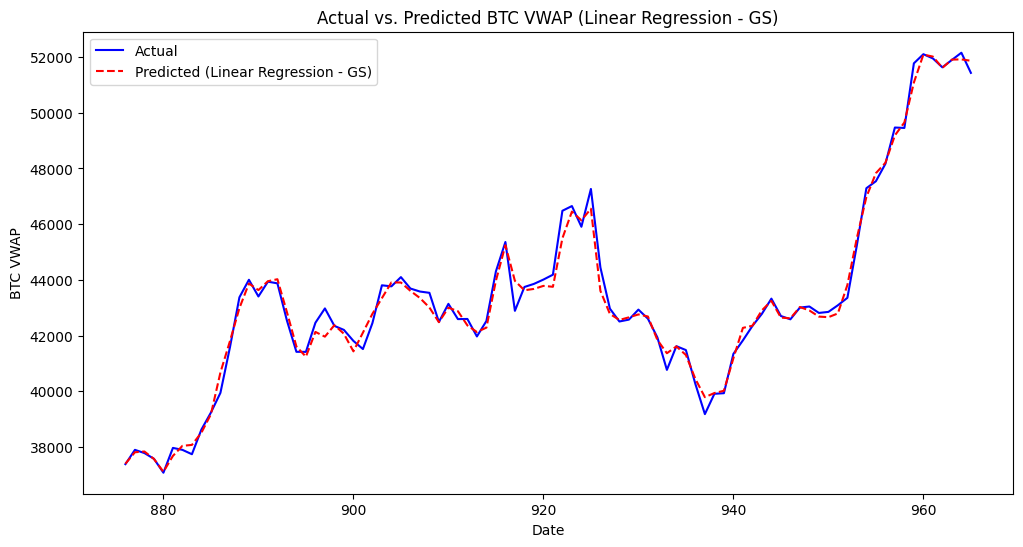

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s
[CV] END .......................................max_depth=15; total time=   0.0s


/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mert/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/mert/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/mert/.local/lib/python3.10/site-packages/pan

[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s[CV] END .....................................max_depth=None; total time=   0.0s

[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s


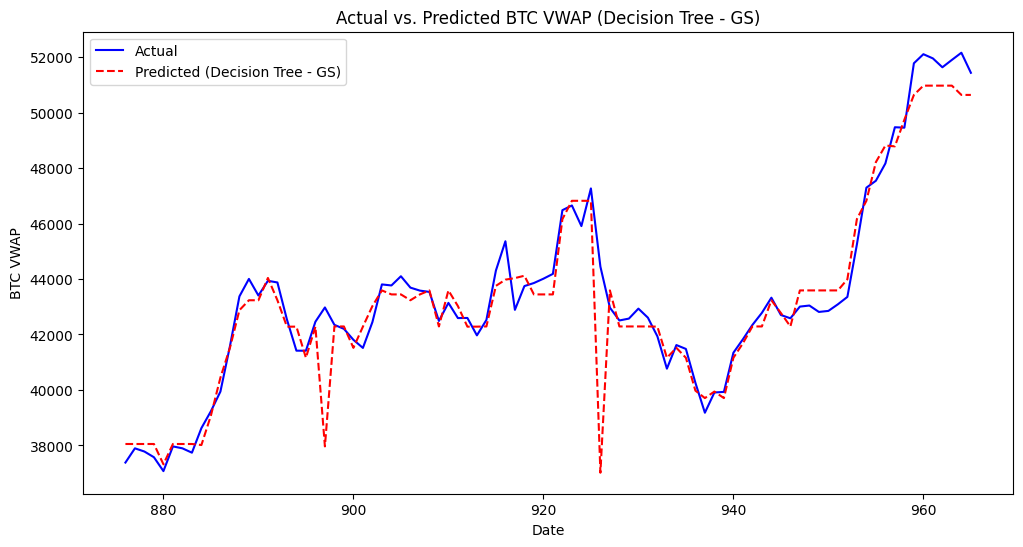

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_es

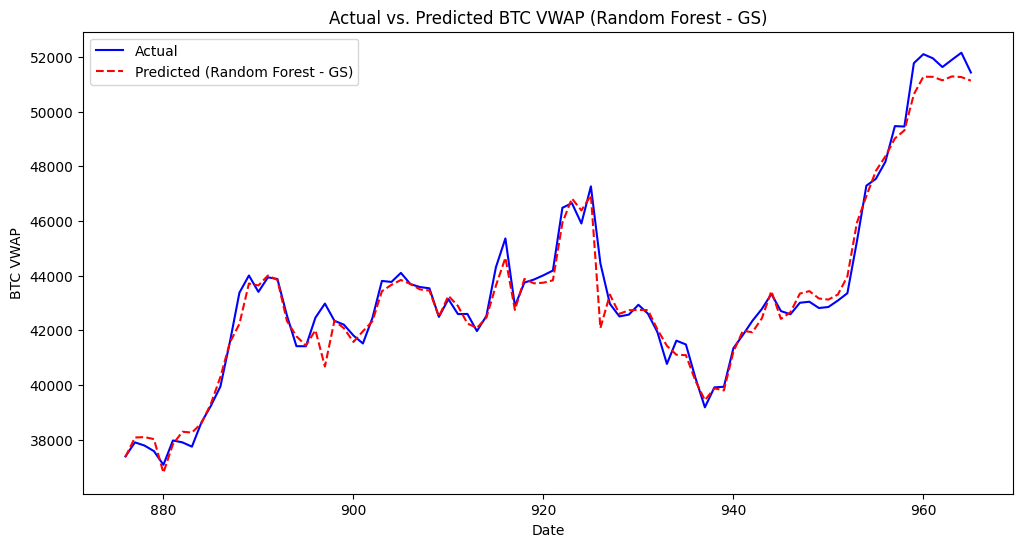

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_es

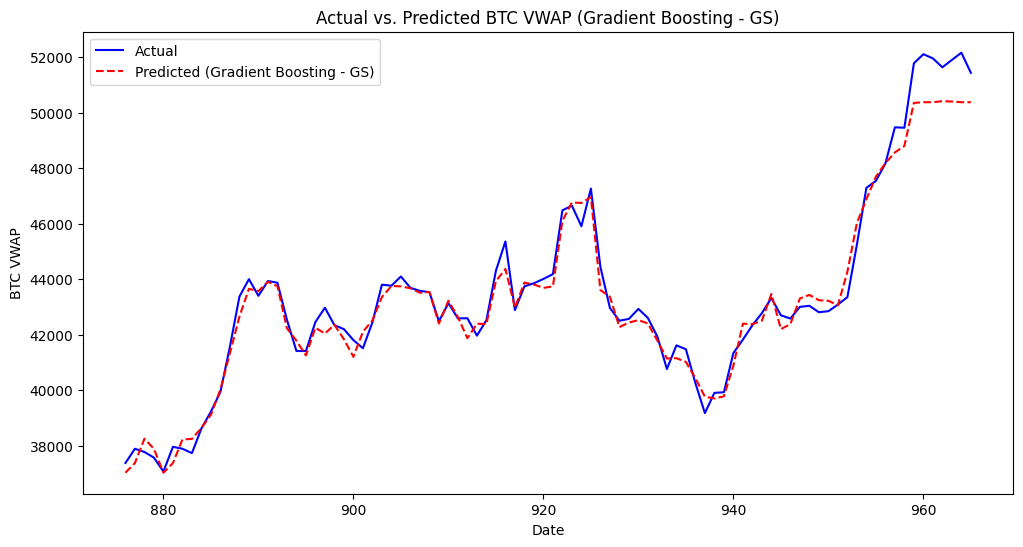

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s

[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s


/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.7s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.4s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.7s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.5s[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.4s

[CV] END ................lea

/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_

[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.3s
[CV] END ................lea

/home/mert/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



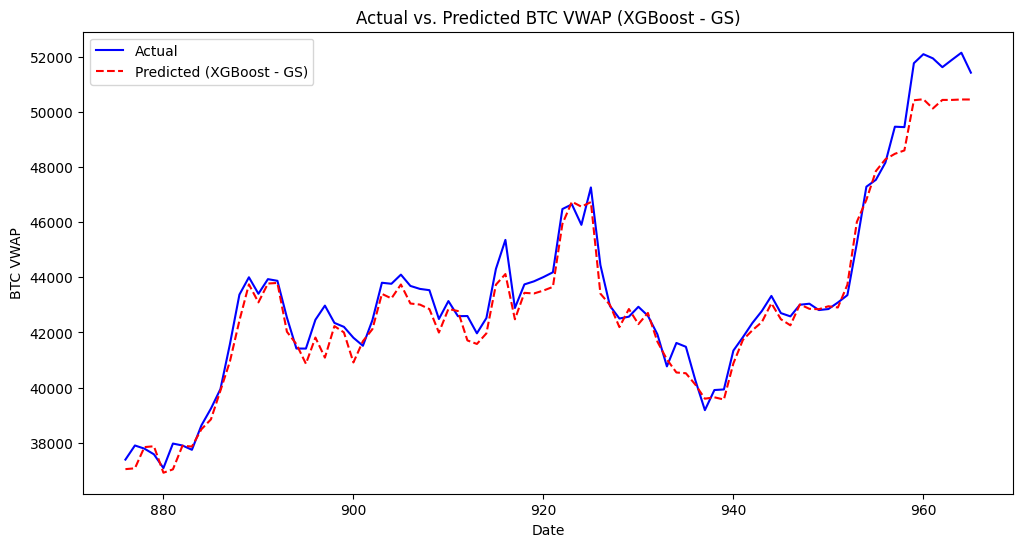

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_roun

[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s


/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_roun

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s



/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_roun

[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.5s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.6s
[CV] END ................lea

/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_roun

[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.1s
[CV] END ................lea

/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mert/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/mert/.local/lib/python3.10/s

[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s


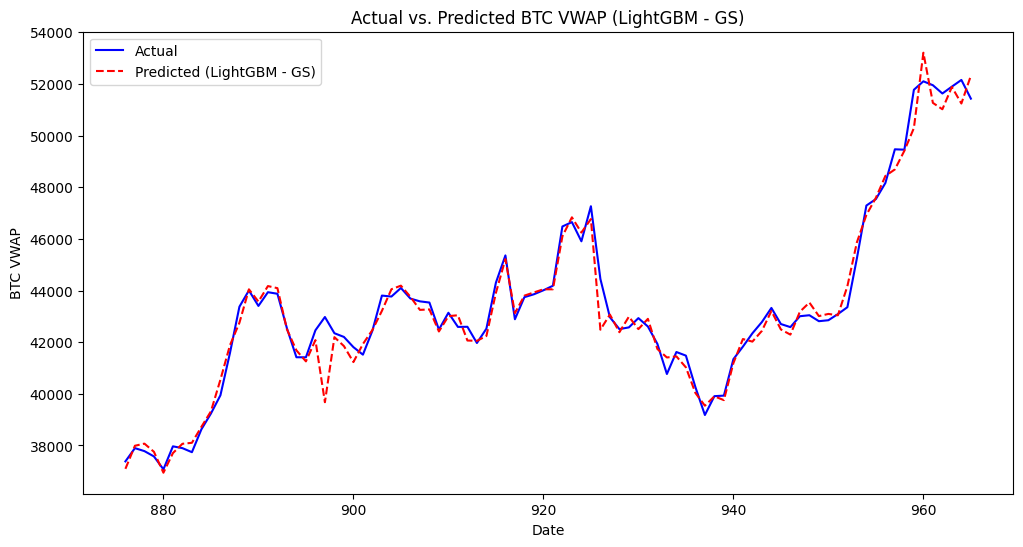

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................iterations=50, learning_rate=0.2; total time=   2.6s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   2.8s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   2.8s
[CV] END ...................iterations=50, learning_rate=0.2; total time=   2.6s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   2.9s
[CV] END ...................iterations=50, learning_rate=0.2; total time=   2.9s
[CV] END ...................iterations=50, learning_rate=0.2; total time=   2.9s
[CV] END ...................iterations=50, learning_rate=0.1; total time=   3.0s
[CV] END ...................iterations=50, learning_rate=0.2; total time=   2.7s
[CV] END ..................iterations=50, learning_rate=0.01; total time=   3.0s
[CV] END ...................iterations=50, learning_rate=0.1; total time=   3.2s
[CV] END ...................iterations=50, learni

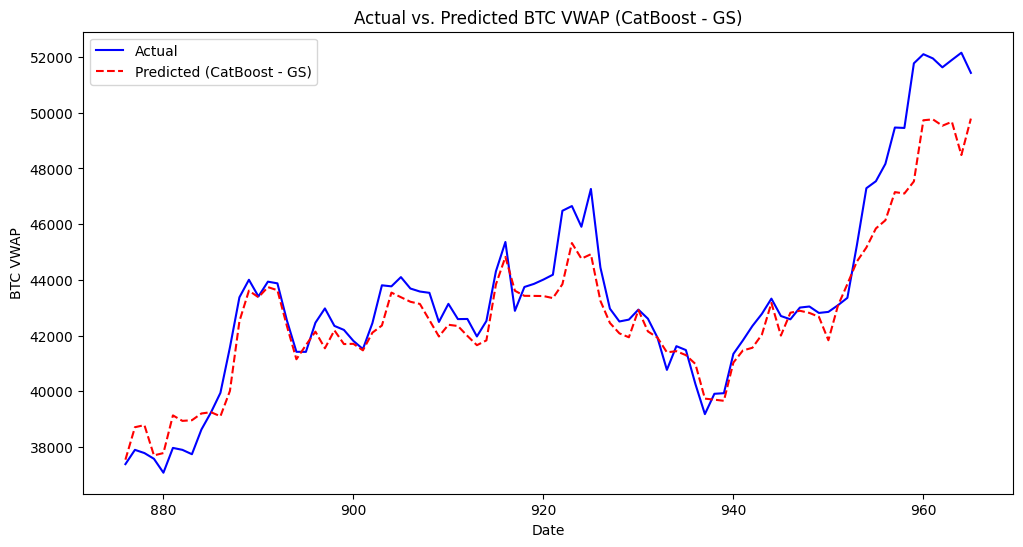

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.4s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END .................learning_rate=0.1, n_es

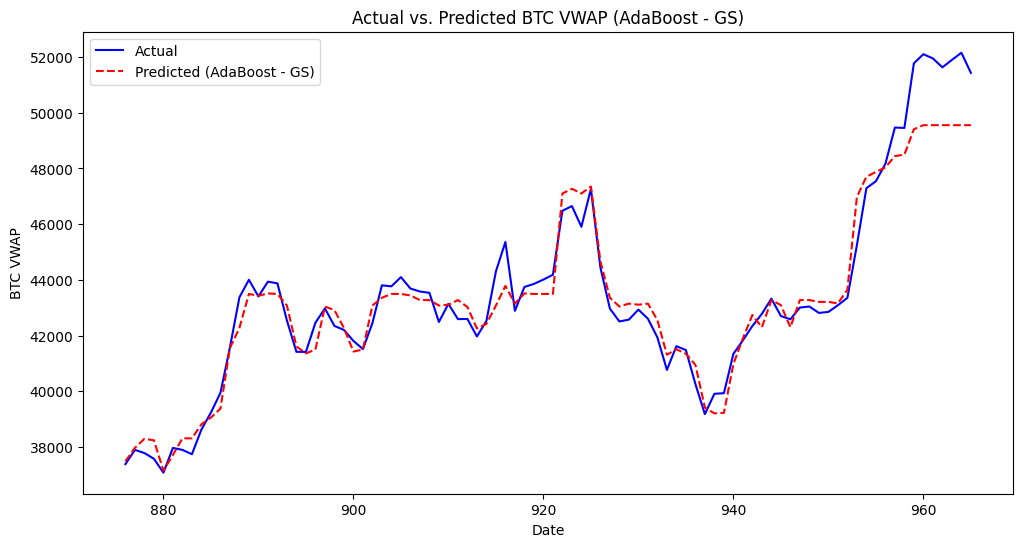

RMSE Scores (Grid Search):
Linear Regression: 338.0700450981946
Decision Tree: 1092.6730316937883
Random Forest: 513.6453057289204
Gradient Boosting: 575.1006393381367
XGBoost: 660.3157182924328
LightGBM: 568.4453079464571
CatBoost: 1160.1215364763377
AdaBoost: 834.0536728727433

MAE Scores (Grid Search):
Linear Regression: 244.1980829335159
Decision Tree: 585.8204441851708
Random Forest: 343.1346964389744
Gradient Boosting: 418.1405468223898
XGBoost: 507.7760250497776
LightGBM: 361.8447537917169
CatBoost: 824.8530827531338
AdaBoost: 575.8104370873581
MAPE Scores:
Linear Regression: 0.5620437055250302
Decision Tree: 1.325791086213512
Random Forest: 0.777571115923921
Gradient Boosting: 0.9317284503630778
XGBoost: 1.1380005342159363
LightGBM: 0.8192494649693208
CatBoost: 1.8198914110864994
AdaBoost: 1.2666147015569684


In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Model performanslarını tutacak listeler
rmse_scores = []
mae_scores = []

# Modelleri eğitme ve Grid Search ile performansı değerlendirme
for model_name, model in models.items():
    # İlgili model için parametre gridini al
    param_grid = param_grids[model_name]

    # GridSearchCV kullanarak modeli ve parametre gridini belirtme
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
    
    # XGBoost, LightGBM ve CatBoost modelleri için ayrıca belirli parametreleri kontrol etmek gerekebilir.
    if 'XGBoost' in model_name:
        grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'LightGBM' in model_name:
        grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    elif 'CatBoost' in model_name:
        grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    else:
        grid_search.fit(X_train, y_train)
    
    # En iyi modeli seçme
    best_model = grid_search.best_estimator_

    # En iyi modelle tahmin yapma
    y_pred_train_gs = best_model.predict(X_train)
    y_pred_test_gs = best_model.predict(X_test)
    y_pred_valid = best_model.predict(valid_X)
    
    # RMSE ve MAE hesaplamaları
    rmse_gs = np.sqrt(mean_squared_error(valid_y, y_pred_valid))
    mae_gs = mean_absolute_error(valid_y, y_pred_valid)
    mape = np.mean(np.abs((valid_y - y_pred_valid) / valid_y)) * 100

    # Skoru listeye ekleme
    mape_scores.append((model_name, mape))
    rmse_scores.append((model_name, rmse_gs))
    mae_scores.append((model_name, mae_gs))

    # Tahminlerin gerçek değerlerle karşılaştırılması için grafikleştirme
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
    plt.plot(data.index[-len(valid_y):], y_pred_valid, label=f'Predicted ({model_name} - GS)', linestyle='dashed', color='red')
    plt.title(f'Actual vs. Predicted BTC VWAP ({model_name} - GS)')
    plt.xlabel('Date')
    plt.ylabel('BTC VWAP')
    plt.legend()
    plt.show()

print("RMSE Scores (Grid Search):")
for model_name, rmse_gs in rmse_scores:
    print(f"{model_name}: {rmse_gs}")

print("\nMAE Scores (Grid Search):")
for model_name, mae_gs in mae_scores:
    print(f"{model_name}: {mae_gs}")

print("MAPE Scores:")
for model_name, mape in mape_scores:
    print(f"{model_name}: {mape}")

In [26]:
import plotly.express as px

# Her bir model için tahminleri ve gerçek değerleri birleştirme
predictions_df = pd.DataFrame({
    'Date': data.index[-len(valid_y):],
    'Actual': valid_y,
    'Model': ['Actual'] * len(valid_y)
})

# Modelleri eğitme ve tahminleri DataFrame'e ekleme
for model_name, model in models.items():
    # Her bir modeli eğitme
    model.fit(X_train, y_train)
    
    # Her bir model için tahmin yapma
    y_pred_valid = model.predict(valid_X)
    
    # Tahminleri DataFrame'e ekleme
    predictions_df = pd.concat([predictions_df, pd.DataFrame({
        'Date': data.index[-len(valid_y):],
        'Actual': y_pred_valid,
        'Model': [f'{model_name}'] * len(valid_y)
    })])

# Plotly Express kullanarak çizim
fig = px.line(predictions_df, x='Date', y='Actual', color='Model', title='Actual vs. Predicted BTC VWAP',
              labels={'Actual': 'BTC VWAP', 'Date': 'Date'})
fig.show()


Learning rate set to 0.039303
0:	learn: 12248.4250849	total: 1.32ms	remaining: 1.32s
1:	learn: 11875.5458685	total: 2.23ms	remaining: 1.11s
2:	learn: 11463.7480114	total: 3.21ms	remaining: 1.07s
3:	learn: 11057.4861821	total: 4.09ms	remaining: 1.02s
4:	learn: 10692.6834876	total: 4.96ms	remaining: 988ms
5:	learn: 10322.2375330	total: 5.69ms	remaining: 943ms
6:	learn: 10012.2642907	total: 6.79ms	remaining: 964ms
7:	learn: 9676.7376887	total: 7.76ms	remaining: 963ms
8:	learn: 9361.1760919	total: 8.61ms	remaining: 948ms
9:	learn: 9041.8416599	total: 9.38ms	remaining: 929ms
10:	learn: 8756.2635186	total: 10.2ms	remaining: 913ms
11:	learn: 8452.9495742	total: 10.9ms	remaining: 895ms
12:	learn: 8171.4996159	total: 11.7ms	remaining: 888ms
13:	learn: 7892.5366077	total: 12.7ms	remaining: 897ms
14:	learn: 7614.9073339	total: 13.7ms	remaining: 897ms
15:	learn: 7362.5719420	total: 14.5ms	remaining: 892ms
16:	learn: 7110.7852828	total: 15.3ms	remaining: 884ms
17:	learn: 6869.7072168	total: 16.2ms	

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
import plotly.express as px

# RMSE, MAE ve MAPE skorlarını DataFrame'e ekleme
scores_df = pd.DataFrame({
    'Model': [item[0] for item in rmse_scores],
    'RMSE': [item[1] for item in rmse_scores],
    'MAE': [item[1] for item in mae_scores],
    'MAPE': [item[1] for item in mape_scores]
})

# Skorları küçükten büyüğe sıralama
scores_df = scores_df.sort_values(by=['RMSE', 'MAE', 'MAPE'])

# Skorları çubuk grafik olarak görselleştirme
fig_rmse = px.bar(scores_df, x='Model', y='RMSE', title='Root Mean Squared Error (RMSE) Scores',
                  labels={'RMSE': 'Score'}, color='Model')

fig_mae = px.bar(scores_df, x='Model', y='MAE', title='Mean Absolute Error (MAE) Scores',
                 labels={'MAE': 'Score'}, color='Model')

fig_mape = px.bar(scores_df, x='Model', y='MAPE', title='Mean Absolute Percentage Error (MAPE) Scores',
                  labels={'MAPE': 'Score'}, color='Model')

# Grafik gösterme
fig_rmse.show()
fig_mae.show()
fig_mape.show()


/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

